# $\nu$-SQuIDS Demo: Welcome!

In [1]:
%matplotlib inline
import matplotlib as mpl
import nuSQUIDSpy as nsq
import matplotlib.pyplot as plt

import nuSQUIDSTools
import numpy as np
import time as t

In [2]:
t0=t.time()

Welcome to the $\nu$-SQuIDS demo. In 
this notebook we will demostrate some of the functionalities of the $\nu$-SQuIDS' python bindings. All of the calculations performed here can also be done in the C++ interface. Enjoy :)! Carlos, Jordi & Chris.

# The Basics: single energy mode

#### Basic definitions

To start, like in the C++ case, we need to create a $\nu$-SQuIDS object. To begin this demonstration we will create a simple single energy three flavor neutrino oscillation calculator. Thus we just need to specify the number of neutrinos (3) and if we are dealing with neutrinos or antineutrinos.

In [3]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)

nuSQuIDS inputs should be given in natural units. In order to make this convenient we have define a units class called *Const*. We can instanciate it as follows

In [4]:
units = nsq.Const()

As in the C++ $\nu$-SQuIDS interface one can propagate the neutrinos in various environments (see the documentation for further details), and the user can create and include their own environments. To start a simple case, lets consider oscillactions in <strong> Vacuum </strong>

In [5]:
nuSQ.Set_Body(nsq.Vacuum())

Since we have specify that we are considering vacuum propagation, we must construct - as in the C++ interface - a *trayectory* inside that object. This can be done using the `Track` property of the given `Body`. Each `Body` will have its on `Track` subclass and its constructors. We can set and construct a <strong>vacuum trayectory</strong> in the following way:

In [6]:
nuSQ.Set_Track(nsq.Vacuum.Track(100.0*units.km))

Next we have to set the <strong>neutrino energy</strong>, which can be done as follows

In [7]:
nuSQ.Set_E(1.0*units.GeV)

Now we have to tell $\nu$-SQuIDS what is the **initial neutrino state** and if such state is given in the **flavor or mass basis**. We can do this using the `Set_initial_state` function and providing it with a *list* and a *string*. If the string is *flavor* then list must contain [$\phi_e$,$\phi_\mu$,$\phi_\tau$], similarly if the string is *mass* it the list must specify $\phi_i$. Lets set the initial state to $\nu_\mu$.

In [8]:
nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)

Finally we can tell $\nu$-SQuIDS to perform the calculation. In case one (or all) of the above parameters is not set $\nu$-SQuIDS will throw an exception and tell you to fix it, but if you have defined everything then it will evolve the given state.

In [9]:
%time
nuSQ.EvolveState()

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 14.8 µs


After this runs $\nu$-SQuIDS has evolved the state and store it in memory. Now there are lots of things you can ask $\nu$-SQuIDS to do. What is the flavor composition now?

In [10]:
[nuSQ.EvalFlavor(i) for i in range(3)]

[0.004675502573140013, 0.9022064087866011, 0.09311808864025879]

#### Writing and Reading the state

$\nu$-SQuIDS knows everything about the neutrino state at the current moment, it also knows what we did with it so far, where it went, what mixing parameters were used, etc. It would be convenient to store this information. One way of doing this is to **save the $\nu$-SQuIDS status**, we can do this in the following way

In [11]:
nuSQ.WriteStateHDF5("current_state.hdf5")

Everything that is in the $\nu$-SQuIDS object is now in that file. We can use that file to create a new $\nu$-SQuIDS object and do another calculation, we can stop the calculation midway and use it to restart, we can explore that file with other analysis tools, etc. In particular, the `ReadStateHDF5` will return us to the given configuration.

In [12]:
nuSQ.ReadStateHDF5("current_state.hdf5")

#### Simple Plot

Lets use the current tool to try to calculate $P(\nu_\mu \to \nu_e)$ as a function of energy. We can do the following

In [13]:
energy_values = np.linspace(1,10,40)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

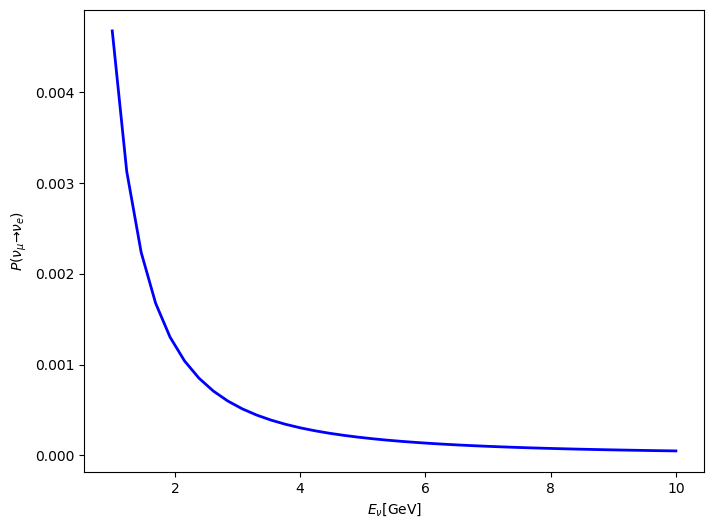

In [14]:
plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$P(\nu_\mu \to \nu_e)$")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

#### Changing the oscillation parameters

This is a nice plot. But we do not see an *oscillation* like curve. The reason for this is that the oscillation parameters do not produce an oscillation pattern in this $L/E$ scale. **$\nu$-SQuIDs has some predefined oscillation mixing angles ($\theta_{ij}$) and mass splittings ($\Delta m^2_{ij}$)**, which we have taken from the most recents fits. Perhaps you want to change this parameter to investigate what happens, this can be done easily using the `Set` function.

In [15]:
nuSQ.Set_SquareMassDifference(1,2.0e-1) # sets dm^2_{21} in eV^2., small values lead to exp like drop offs, high values to osc.

We can then, again, do a plot with this simple script

In [16]:
energy_values = np.linspace(1,10,100)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

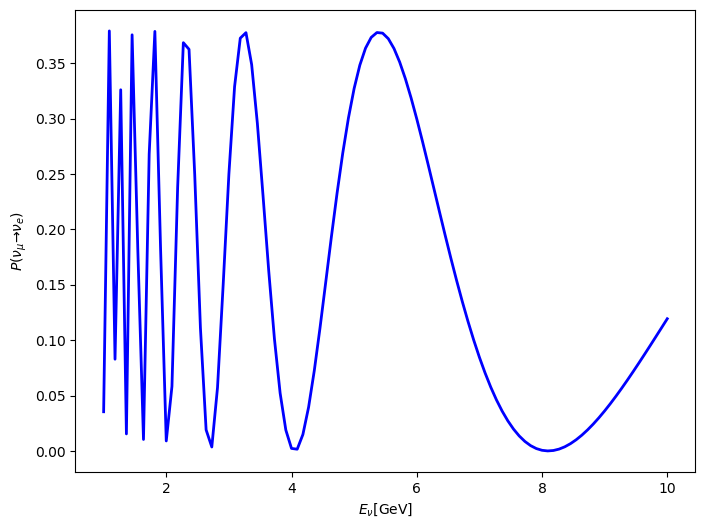

In [17]:
plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$P(\nu_\mu \to \nu_e)$")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

We can also try to modify the mixing angles (see how to do this in detail in the documentation), for example

In [18]:
nuSQ.Set_MixingAngle(0,1,1.2) # sets \theta_{12} in radians.
nuSQ.Set_MixingAngle(0,2,0.3) # sets \theta_{23}} in radians.
nuSQ.Set_MixingAngle(1,2,0.4) # sets \theta_{23}} in radians.

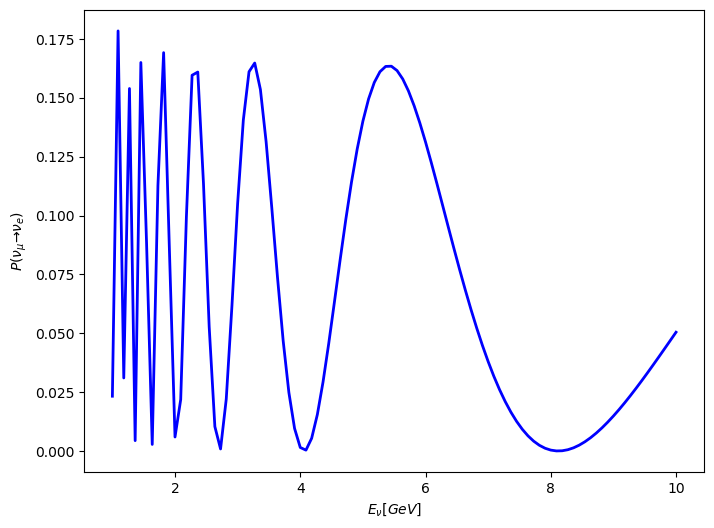

In [19]:
energy_values = np.linspace(1,10,100)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"$P(\nu_\mu \to \nu_e)$")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

We can now go back to the defaults, which are the values given by Gonzalez-Garcia et al. (arXiv:1409.5439)

In [20]:
nuSQ.Set_MixingParametersToDefault()

#### Changing where the neutrino propagation takes place

As in the C++ implementation we can change the `Body` by means of the `Set_Body` function and in similar way we can change the `Track`. Lets do an atmospheric oscillation example =).

In [21]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1))) #so 180° at zenith?, curves "open" with wider incident angle
nuSQ.Set_rel_error(1.0e-17) #more precise but higher loading times
nuSQ.Set_abs_error(1.0e-17)

(0.0, 1.0)

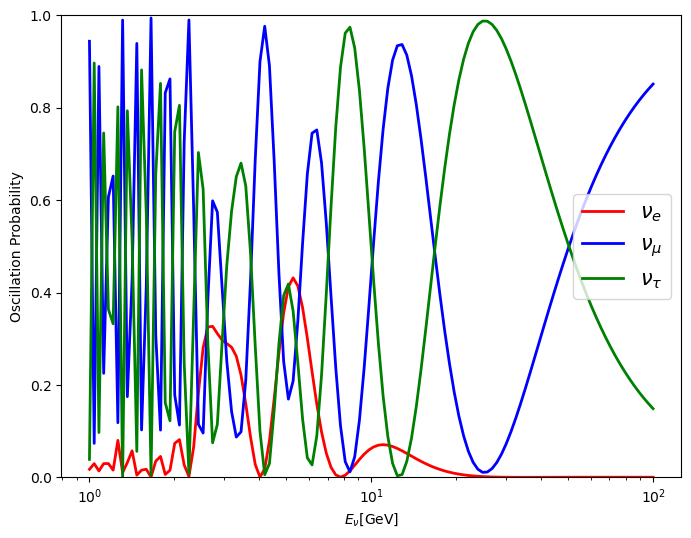

In [22]:
energy_values = np.logspace(0,2,120)
nu_mu_to_nu_e = []
nu_mu_to_nu_mu = []
nu_mu_to_nu_tau = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor) #very big difference between changing mass and flavor basis
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
    nu_mu_to_nu_mu.append(nuSQ.EvalFlavor(1))
    nu_mu_to_nu_tau.append(nuSQ.EvalFlavor(2))

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"Oscillation Probability")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(energy_values,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu$")
plt.plot(energy_values,nu_mu_to_nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.legend(fancybox = True, fontsize = 15, loc = 7)
plt.semilogx()
plt.ylim(0.,1.)

#### A 750 km baseline experiment in Earth ####

In [23]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino) #earth model=concentric shells of different densities
nuSQ.Set_Body(nsq.Earth()) #track through earth, assumption=radial?
nuSQ.Set_Track(nsq.Earth.Track(750.0*units.km))

In [24]:
nuSQ.Set_rel_error(1.0e-15)
nuSQ.Set_abs_error(1.0e-17)

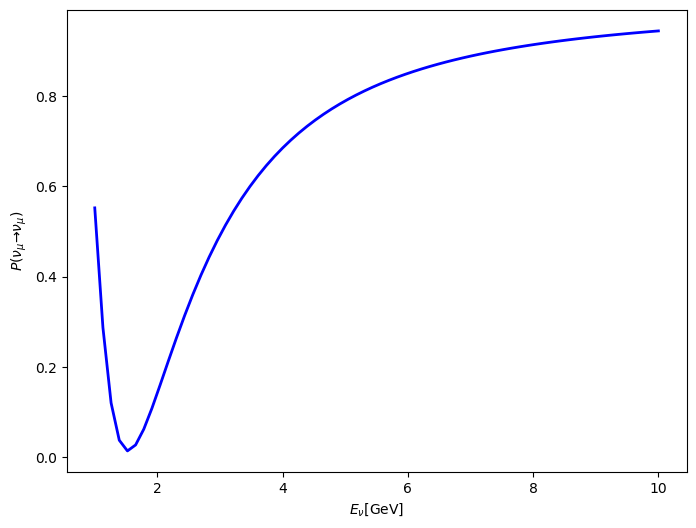

In [25]:
energy_values = np.linspace(1,10,70)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(1))

plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$P(\nu_\mu \to \nu_\mu)$")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')

#### Propagating in a constant density slap ####

In [26]:
nuSQ = nsq.nuSQUIDS(3,nsq.NeutrinoType.neutrino)
nuSQ.Set_Body(nsq.ConstantDensity(13.0,0.5))
nuSQ.Set_Track(nsq.ConstantDensity.Track(1000.0*units.km))

26.916745901107788 s


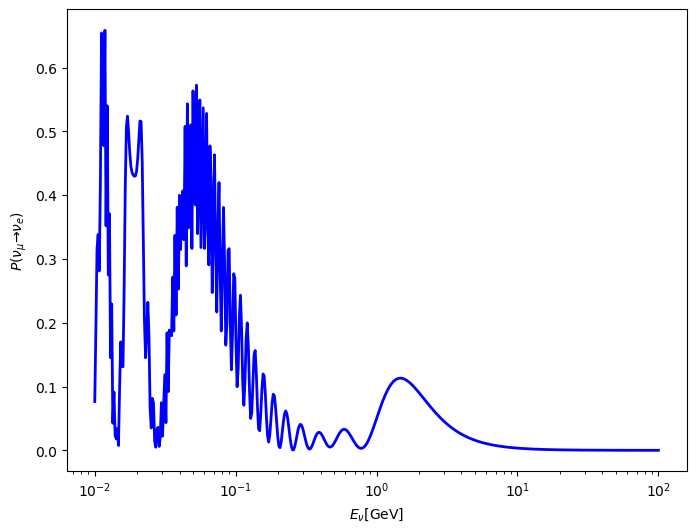

In [27]:
t1=t.time()
energy_values = np.logspace(-2,2,500)
nu_mu_to_nu_e = []
for Enu in energy_values:
    nuSQ.Set_E(Enu*units.GeV)
    nuSQ.Set_initial_state(np.array([0.,1.,0.]),nsq.Basis.flavor)
    nuSQ.EvolveState()
    nu_mu_to_nu_e.append(nuSQ.EvalFlavor(0))
plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$P(\nu_\mu \to \nu_e)$")
plt.plot(energy_values,nu_mu_to_nu_e, lw = 2, color = 'blue')
plt.semilogx()
t2=t.time()
print(t2-t1,"s") #roughly 5s per energy value -> ~40min for 500

# Advanced: multiple energy mode

So far we have been able to calculate the oscillation probability in a given `Body` and `Track`. We have also been able to change the oscillation parameters (mixing angles and square mass differences), as well as changing the neutrino energy. This is what solving the **Schödinger evolution equation** does and it is a good approximation for most cases, but $\nu$-SQuIDS does **more**: it can solve a **quantum Boltzmann equation**. This means that it can solve a system of the following form

$$\frac{\partial\hat{\rho}_i}{\partial x} = i [H,\hat{\rho}_i] + \{A,\hat{\rho}_i\} + O(\hat{\rho}_i,\hat{\rho}_j)$$

where $\hat{\rho_i}$ represents the neutrino state at $E_\nu = E_i$, $H$ is the Hamiltonian, $A$ is a non unitary operator, and $O$ is an operator that contains the interactions between neutrino states of energies $E_i$ and $E_j$. The **SQuIDS package was designed to solve this kind of equations** (and *more*), in particular **$\nu$-SQuIDS implements this equation for neutrino propagation** in matter including the effects of neutral and charge current interactions, as well as the associated neutral and tau regeneration. For further details refer to [Gonzalez-Garcia et al.](#CHM)

To begin we have to specify the $\{E_i\}$ grid where the equation will be solve. The energy nodes can be an arbitrary ordered list of energy in eV. The most common choices is to have linearly spaced nodes or logarithmically spaced nodes. For constructing numpy array of linear and logarithmic scales nuSQuIDS provides two convenient functions called linspace and logspace respectively.

# Multiple Energy Mode without Interactions

In [28]:
interactions = False

E_min = 1.0*units.GeV
E_max = 10.0*units.GeV
E_nodes = 101

energy_nodes = nsq.logspace(E_min,E_max,E_nodes)

neutrino_flavors = 3

nuSQ = nsq.nuSQUIDS(energy_nodes,neutrino_flavors,nsq.NeutrinoType.neutrino,interactions)

We can see the nodes energies $\{E_i\}$, which is (in [eV])

In [29]:
nuSQ.GetERange(); #1GeV to 10GeV

Lets propage this neutrino through the Earth in an atmospheric neutrino telescope setting. We can do that by setting the following `Body` and `Track`:

In [30]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))

Lets assume that $\phi_\nu = N_0 E^{-2}$, with flavor composition $\phi_e:\phi_\mu:\phi_\tau$ = $0:1:0$. $\nu$-SQuIDS input flux is a `numpy.ndarray` formatted in the following way : 

$$InputState \doteq [[\phi^1_e,\phi^1_\mu,\phi^1_\tau],...,[\phi^i_e,\phi^i_\mu,\phi^i_\tau],...,[\phi^n_e,\phi^n_\mu,\phi^n_\tau]]$$ where i = 1 to n and n is the number of energy nodes. We can implement this in the following way

In [31]:
N0 = 1.0e18
Eflux = lambda E: N0*E**-2
Einitial = (Eflux(nuSQ.GetERange()).reshape((101,1)))*(np.array([0.,1.,0.]).reshape(1,3))

We can plot the initial flux:

[]

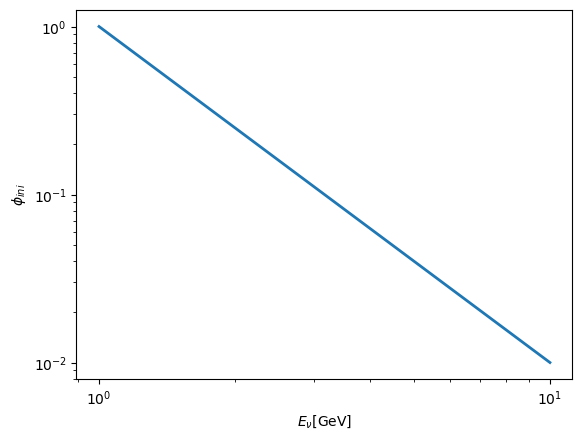

In [32]:
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$\phi_{ini}$")
plt.plot(np.array(nuSQ.GetERange())/units.GeV,np.array(Einitial)[:,1], lw = 2)
plt.loglog()

Lets set this initial state

In [33]:
nuSQ.Set_initial_state(Einitial,nsq.Basis.flavor)

Lets **propage** this flux through the **Earth**

In [34]:
nuSQ.Set_rel_error(1.0e-17)
nuSQ.Set_abs_error(1.0e-17)
nuSQ.Set_h_max(500.0*units.km)

In [35]:
nuSQ.EvolveState()

That' it. Now `nuSQ` contains the evolved object. Lets get the information from it.

We can now calculate all of the flavor contributions at this current time. Notice that we can even increase the energy resolution in this multiple energy mode. The reason for this is that $\nu$-SQuIDS stores the neutrino states (${\rho_i}$) in the interaction basis, thus it can interpolate between states and then proyect into flavor. In symbols, for a given neutrino energy $E_\nu$ and flavor $\alpha$,

$$\texttt{EvalFlavor}(E_\nu,\alpha) = {\rm Tr}\left[\Pi_\alpha (E_\nu) * \rho(E_\nu)\right]$$

where $\Pi_\alpha (E_\nu) = e^{-i\hat{H_0}}\Pi_\alpha e^{i\hat{H_0}}$, with $H_0$ the base hamiltonian evaluated at $E_\nu$, and $\rho(E_\nu)$ is a linear interpolation of the $\rho_i$ states in the energy (node) axis.

In [36]:
e_range = np.linspace(1.0,10.0,200)

nu_e = np.array([nuSQ.EvalFlavor(0,EE*units.GeV,0) 
                           for EE in e_range])
nu_mu = np.array([nuSQ.EvalFlavor(1,EE*units.GeV,0) 
                           for EE in e_range])
nu_tau = np.array([nuSQ.EvalFlavor(2,EE*units.GeV,0) 
                           for EE in e_range])

total = nu_e + nu_mu + nu_tau

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


[]

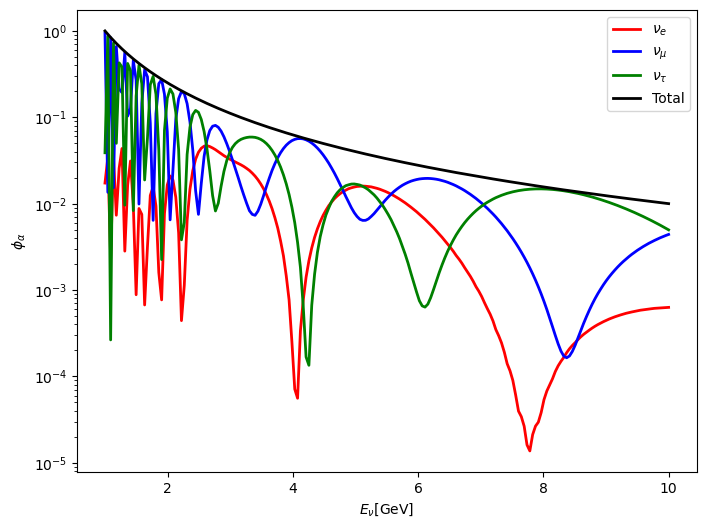

In [37]:
plt.figure(figsize = (8,6))

plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$\phi_\alpha$")

plt.plot(e_range,nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(e_range,nu_mu, lw = 2, color = 'blue', label = r"$\nu_\mu$")
plt.plot(e_range,nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.plot(e_range,total, lw = 2, color = 'black', label = r"Total")
plt.legend(fancybox = True, fontsize = 10)
plt.semilogy()

We can now try to reproduce the plot that we did in the single energy case: $P(\nu_\mu \to \nu_e)$. If you compare with the single energy plot you will notice that they are in agrement and, furthermore, the multiple energy mode **was able to reproduce the *fast* oscillation behaviour** at low energies eventhough it has **less energy nodes**

(0.0, 1.0)

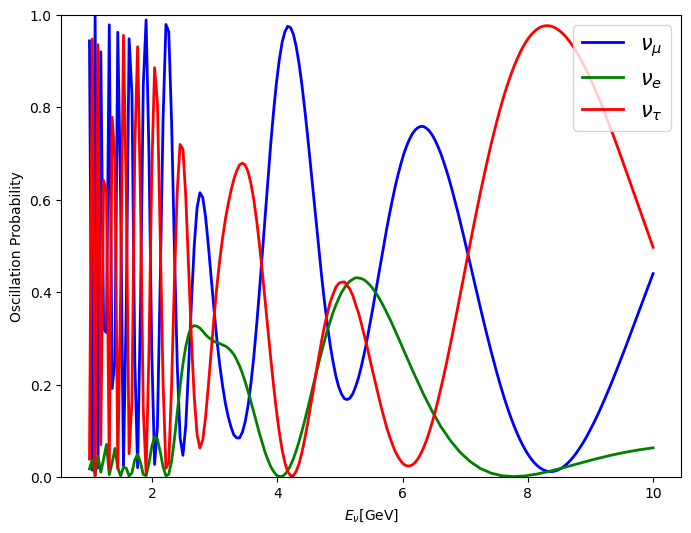

In [38]:
plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"Oscillation Probability")

nu_mu_to_nu_mu = nu_mu/Eflux(e_range*units.GeV)
nu_mu_to_nu_tau = nu_tau/Eflux(e_range*units.GeV)
nu_mu_to_nu_e = nu_e/Eflux(e_range*units.GeV)

plt.plot(e_range,nu_mu_to_nu_mu, lw = 2, color = 'blue',label = r"$\nu_\mu$")
plt.plot(e_range,nu_mu_to_nu_e, lw = 2, color = 'green',label = r"$\nu_e$")
plt.plot(e_range,nu_mu_to_nu_tau, lw = 2, color = 'red',label = r"$\nu_\tau$")
plt.legend(fancybox = True, fontsize = 15, loc = 'upper right')
plt.ylim(0.,1.)

# Multiple Energy Mode with Interactions

The multiple energy mode solves the quantum differential equactions in an energy grid (${E_i}$), this enables to include interactions between nodes at positions $i$ and $j$. We will now exemplify this.

In [39]:
interactions = True

E_min = 1.0e2*units.GeV
E_max = 1.0e8*units.GeV
E_nodes = 200
energy_nodes = nsq.logspace(E_min,E_max,E_nodes)

neutrino_flavors = 3

nuSQ = nsq.nuSQUIDS(energy_nodes,neutrino_flavors,nsq.NeutrinoType.neutrino,interactions)

In [40]:
N0 = 1.0e18; Power = -1.0 #different power law than before
Eflux = lambda E: N0*E**Power
InitialFlux = (Eflux(nuSQ.GetERange()).reshape(E_nodes,1))*(np.array([0.,1.,0.]).reshape(1,3))

In [41]:
nuSQ.Set_rel_error(1.0e-10)
nuSQ.Set_abs_error(1.0e-10)
nuSQ.Set_h_max(500.0*units.km)
nuSQ.Set_MixingParametersToDefault()

In [42]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1.0)))
nuSQ.Set_initial_state(InitialFlux,nsq.Basis.flavor)

In [43]:
%time nuSQ.EvolveState()

CPU times: user 829 ms, sys: 17.1 ms, total: 846 ms
Wall time: 839 ms


In [44]:
nu_e = np.array([nuSQ.EvalFlavorAtNode(0,ie,0)
                           for ie in range(E_nodes)]) #call node by index ie instead of calling energy nodes by their value
nu_mu = np.array([nuSQ.EvalFlavorAtNode(1,ie,0) 
                           for ie in range(E_nodes)])
nu_tau = np.array([nuSQ.EvalFlavorAtNode(2,ie,0) 
                           for ie in range(E_nodes)])

E_range = np.array(nuSQ.GetERange())/units.GeV

total = nu_e + nu_mu + nu_tau

[]

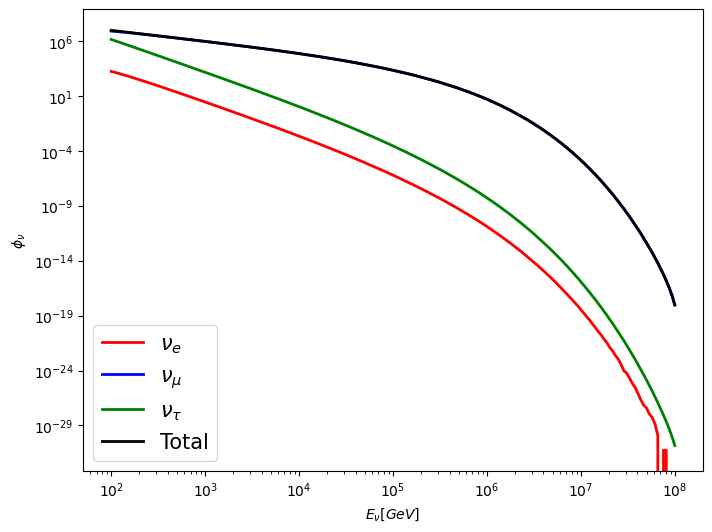

In [45]:
plt.figure(figsize = (8,6))

plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"$\phi_\nu$")

plt.plot(E_range,nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(E_range,nu_mu, lw = 2, color = 'blue', label = r"$\nu_\mu$")
plt.plot(E_range,nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.plot(E_range,total, lw = 2, color = 'black', label = r"Total")
plt.legend(fancybox = True, loc = 'lower left', fontsize = 15)
plt.loglog()

We can compare this calculation with Figure 4 of [Gonzalez-Garcia et al.](#CHM) and find them in excellent agreement. Just note that the small kink at $10^2$ is the result of neutrino oscillations and the difference at high energy attenuation amplitud is due to different cross section.

[]

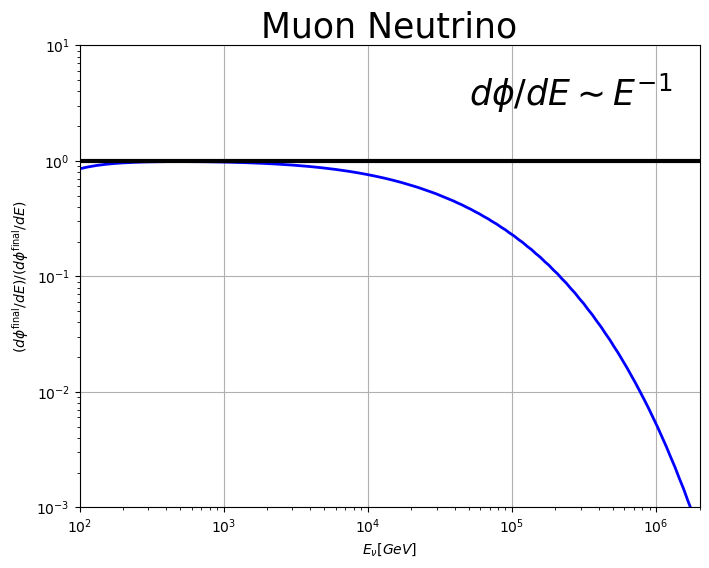

In [46]:
plt.figure(figsize = (8,6))
plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"$(d\phi^{\rm final}/dE)/(d\phi^{\rm final}/dE)$")

nu_mu_to_nu_mu = nu_mu/Eflux(E_range*units.GeV)
plt.plot(E_range,nu_mu_to_nu_mu, lw = 2, color = 'blue')
plt.title(r"Muon Neutrino", fontsize = 25)
plt.text(5.0e4,3.0,r"$d\phi/dE \sim E^{-1}$", fontsize = 25)
plt.axhline (1.0, color = "k", lw = 3)
plt.ylim(1.0e-3,1.0e1)
plt.xlim(1.0e2,2.0e6)
plt.grid()
plt.loglog()

# Handeling neutrinos and antineutrinos with tau regeneration

To include $\tau$ regeneration we have to work on the multi energy mode and set the neutrino type to "both". We can initialize the $\nu$-SQuIDS object in the following way

In [47]:
interactions = True #charged and neutral current

E_min = 1.0e2*units.GeV
E_max = 1.0e8*units.GeV
E_nodes = 200
energy_nodes = nsq.logspace(E_min,E_max,E_nodes)

neutrino_flavors = 3

nuSQ = nsq.nuSQUIDS(energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions)

In this case we need to specify the neutrino and antineutrino initial fluxes. Those have the following format:

$$InputState \doteq [[[\phi^1_e,\phi^1_\mu,\phi^1_\tau],[\bar{\phi}^1_e,\bar{\phi}^1_\mu,\bar{\phi}^1_\tau]],...,[[\phi^i_e,\phi^i_\mu,\phi^i_\tau],[\bar{\phi}^i_e,\bar{\phi}^i_\mu,\bar{\phi}^i_\tau]],...,[[\phi^n_e,\phi^n_\mu,\phi^n_\tau],[\bar{\phi}^n_e,\bar{\phi}^n_\mu,\bar{\phi}^n_\tau]]]$$

where i = 1 to n and n is the number of energy nodes and $\phi$ ($\bar{\phi}$) is the neutrino (antineutrino) flux.

In [48]:
N0 = 1.0e18; Power = -1.0
Eflux = lambda E: N0*E**Power

InitialFlux = np.zeros((200,2,3))
for i,E in enumerate(nuSQ.GetERange()):
    InitialFlux[i][0][0] = 0.0
    InitialFlux[i][1][0] = 0.0
    InitialFlux[i][0][1] = Eflux(E) #muomn and tau neutrino flux equal while electron neutrino flux 0
    InitialFlux[i][1][1] = Eflux(E)
    InitialFlux[i][0][2] = Eflux(E)
    InitialFlux[i][1][2] = Eflux(E)

In [49]:
nuSQ.Set_rel_error(1.0e-7)
nuSQ.Set_abs_error(1.0e-7)
nuSQ.Set_h_max(500.0*units.km)
nuSQ.Set_MixingParametersToDefault()

In [50]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1.0)))
nuSQ.Set_initial_state(InitialFlux,nsq.Basis.flavor)
nuSQ.Set_TauRegeneration(True)

In [51]:
%time nuSQ.EvolveState()

CPU times: user 1.08 s, sys: 20.1 ms, total: 1.1 s
Wall time: 1.09 s


In [52]:
nu_tau = np.array([ nuSQ.EvalFlavorAtNode(2,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_tau_bar = np.array([ nuSQ.EvalFlavorAtNode(2,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

nu_mu = np.array([ nuSQ.EvalFlavorAtNode(1,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_mu_bar = np.array([ nuSQ.EvalFlavorAtNode(1,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

E_range = nuSQ.GetERange()/units.GeV

[]

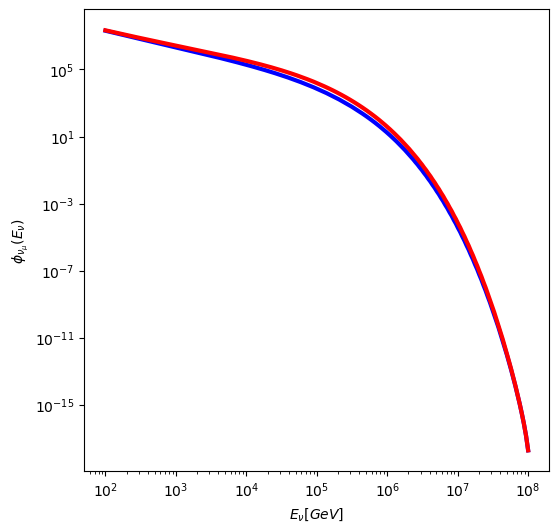

In [53]:
plt.figure(figsize = (6,6))
plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"$\phi_{\nu_\mu} (E_\nu)$")

plt.plot(E_range,nu_mu+nu_mu_bar, lw = 3, color = 'blue')
plt.plot(E_range,nu_tau+nu_tau_bar, lw = 3, color = 'red')
plt.loglog()

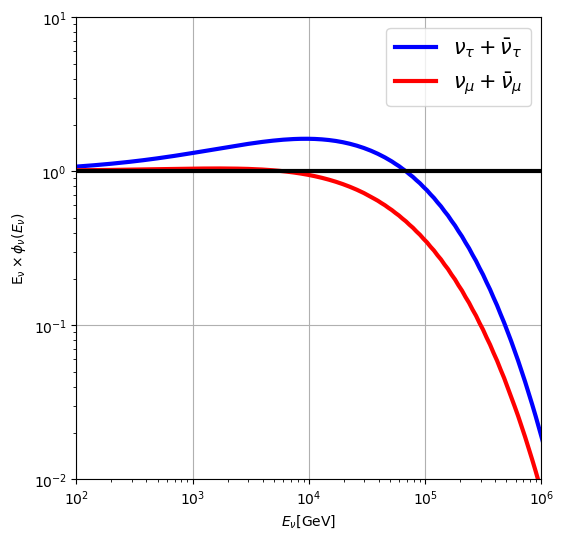

In [54]:
plt.figure(figsize = (6,6))
plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"${\rm E_\nu} \times \phi_\nu (E_\nu)$")
e_range = nuSQ.GetERange()/units.GeV
plt.plot(e_range,0.5*(nu_tau+nu_tau_bar)*(e_range*units.GeV)/N0, lw = 3, label =r"$\nu_\tau + \bar{\nu}_\tau$", color = "blue")
plt.plot(e_range,0.5*(nu_mu+nu_mu_bar)*(e_range*units.GeV)/N0, lw = 3, label =r"$\nu_\mu + \bar{\nu}_\mu$", color = "red")
plt.axhline (1.0, color = "k", lw = 3)
plt.xlim(1.0e2,1.0e6)
plt.ylim(1.0e-2,1.0e1)
plt.grid()
plt.loglog()
plt.legend(loc = "upper right", fancybox = True, fontsize = 15)
plt.savefig("nusquids_python_with_interactions_both.svg",bbox_inches='tight')

# Neutrino Oscillation in a (3+1) model

My own comment: Overall interactions don't seem to change the characteristic behavior of the oscillations most of the time but do modulate the drop off for each of the lepton neutrinos

In [55]:
interactions = False

E_min = 1.0*units.GeV
E_max = 100.0*units.GeV
E_nodes = 201

energy_nodes = nsq.logspace(E_min,E_max,E_nodes)
neutrino_flavors = 4

nuSQ = nsq.nuSQUIDS(energy_nodes,neutrino_flavors,nsq.NeutrinoType.antineutrino,interactions)

In [56]:
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1)))

In [57]:
nuSQ.Set_MixingParametersToDefault()
nuSQ.Set_SquareMassDifference(3,1.)
nuSQ.Set_MixingAngle(1,3,0.6)

In [58]:
N0 = 1.0e18
Eflux = lambda E: N0*E**-2
Einitial = (Eflux(np.array(nuSQ.GetERange())).reshape(E_nodes,1))*(np.array([0.,1.,0.,0.]).reshape(1,4))

In [59]:
nuSQ.Set_initial_state(Einitial,nsq.Basis.flavor)

In [60]:
nuSQ.Set_rel_error(1.0e-7)
nuSQ.Set_abs_error(1.0e-7)

In [61]:
nuSQ.EvolveState()

In [62]:
e_range = np.logspace(0,2,400)

nu_e = np.array([nuSQ.EvalFlavor(0,EE*units.GeV,0)
                           for EE in e_range])
nu_mu = np.array([nuSQ.EvalFlavor(1,EE*units.GeV,0)
                           for EE in e_range])
nu_tau = np.array([nuSQ.EvalFlavor(2,EE*units.GeV,0)
                           for EE in e_range])

total = nu_e + nu_mu + nu_tau

[]

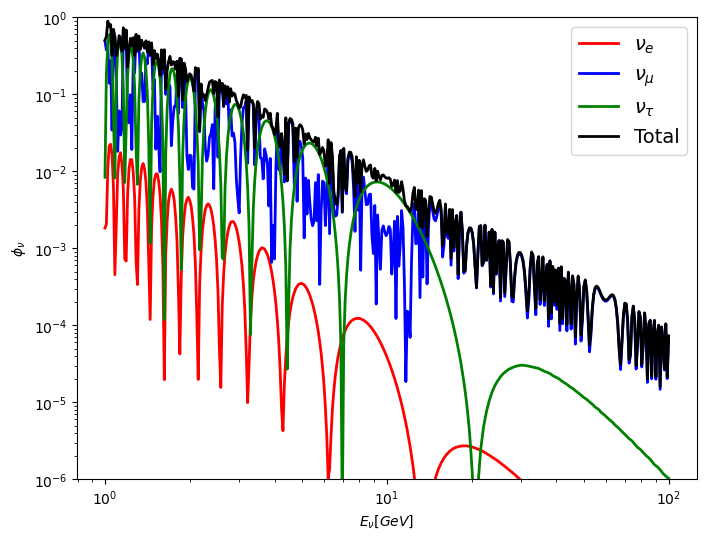

In [63]:
plt.figure(figsize = (8,6))

plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"$\phi_\nu$")

plt.plot(e_range,nu_e, lw = 2, color = 'red', label = r"$\nu_e$")
plt.plot(e_range,nu_mu, lw = 2, color = 'blue', label = r"$\nu_\mu$")
plt.plot(e_range,nu_tau, lw = 2, color = 'green', label = r"$\nu_\tau$")
plt.plot(e_range,total, lw = 2, color = 'black', label = r"Total")
plt.legend(fancybox = True, fontsize = 14)

plt.ylim(1.0e-6,1.0)

plt.loglog()

# nuSQUIDS: Atmospheric Mode

For the atmospheric mode we can use the same construction as the normal nusquids constructor, but add the list of cosine of zenith angles as the first argument. In this case we do not need to set the object, as the Earth is implicity, but we do need to set the initial flux.

In [64]:
interactions = True

E_min = 500.0*units.GeV
E_max = 1.0*units.PeV
E_nodes = 100
energy_nodes = nsq.logspace(E_min,E_max,E_nodes)

cth_min = -1.0
cth_max = 0.1
cth_nodes = 20
cth_nodes = nsq.linspace(cth_min,cth_max,cth_nodes) #from zenith incident to coming slightly cutting the surface 

neutrino_flavors = 3

nsq_atm = nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions) #changed object nsq.nuSQAtm to nuSQUIDSTools.ExtnuSQdAtm

In [65]:
N0 = 1.0e18; Power = -1.0
Eflux = lambda E: N0*E**Power

AtmInitialFlux = np.zeros((len(cth_nodes),len(energy_nodes),2,neutrino_flavors))
for ic,cth in enumerate(nsq_atm.GetCosthRange()):
    for ie,E in enumerate(nsq_atm.GetERange()):
        AtmInitialFlux[ic][ie][0][0] = 0.0 # nue
        AtmInitialFlux[ic][ie][1][0] = 0.0 # bar nue
        AtmInitialFlux[ic][ie][0][1] = Eflux(E) # nu mu
        AtmInitialFlux[ic][ie][1][1] = Eflux(E) # bar nu mu
        AtmInitialFlux[ic][ie][0][2] = Eflux(E) # nu tau
        AtmInitialFlux[ic][ie][1][2] = Eflux(E) # bar nu tau

In [66]:
nsq_atm.Set_initial_state(AtmInitialFlux,nsq.Basis.flavor)

In [67]:
#nsq_atm.Set_ProgressBar(True) # progress bar will be printed on terminal, next cell takes a long time to load

In [68]:
nsq_atm.Set_rel_error(1.0e-15)
nsq_atm.Set_abs_error(1.0e-15)
nsq_atm.EvolveState()

In [69]:
erange = nsq_atm.GetERange()
neutype = 1
phi_e = [nsq_atm.EvalFlavor(0,-0.5,EE,neutype) for EE in erange]
phi_mu = [nsq_atm.EvalFlavor(1,-0.5,EE,neutype) for EE in erange]
phi_tau = [nsq_atm.EvalFlavor(2,-0.5,EE,neutype) for EE in erange]

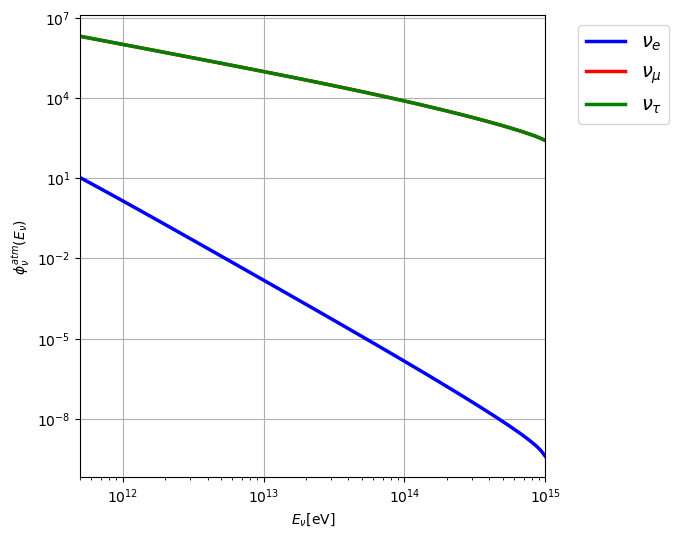

In [70]:
plt.figure(figsize = (6,6))

plt.plot(erange,phi_e, lw = 2.5, color = "blue", label = r"$\nu_e$")
plt.plot(erange,phi_mu, lw = 2.5, color = "red", label = r"$\nu_\mu$") #same size as phi_tau in the with the original parameters
plt.plot(erange,phi_tau, lw = 2.5, color = "green", label = r"$\nu_\tau$")

plt.loglog()

plt.xlim(erange[0],erange[-1])
plt.xlabel(r"$E_\nu [{\rm eV}]$")
plt.ylabel(r"$\phi^{atm}_\nu (E_\nu)$")

plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox = True)

We can use the convenient python-only PlotFlavor member function to plot the nu mu flux as a function
of the energy and zenith.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


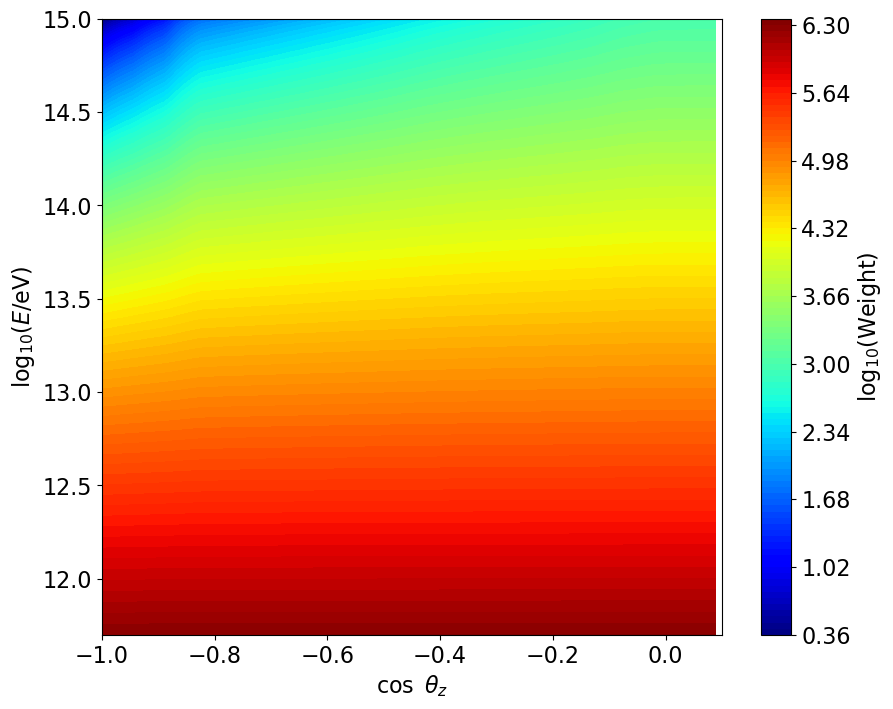

In [71]:
numu = 1
neutrino = 0
figure = nsq_atm.PlotFlavor(numu,neutrino) #PlotFlavor is function classext of nsqAtm --> nsqAtm itself doesnt find it, needs to be ExtnsqAtm object

Similarly the muon antineutrino

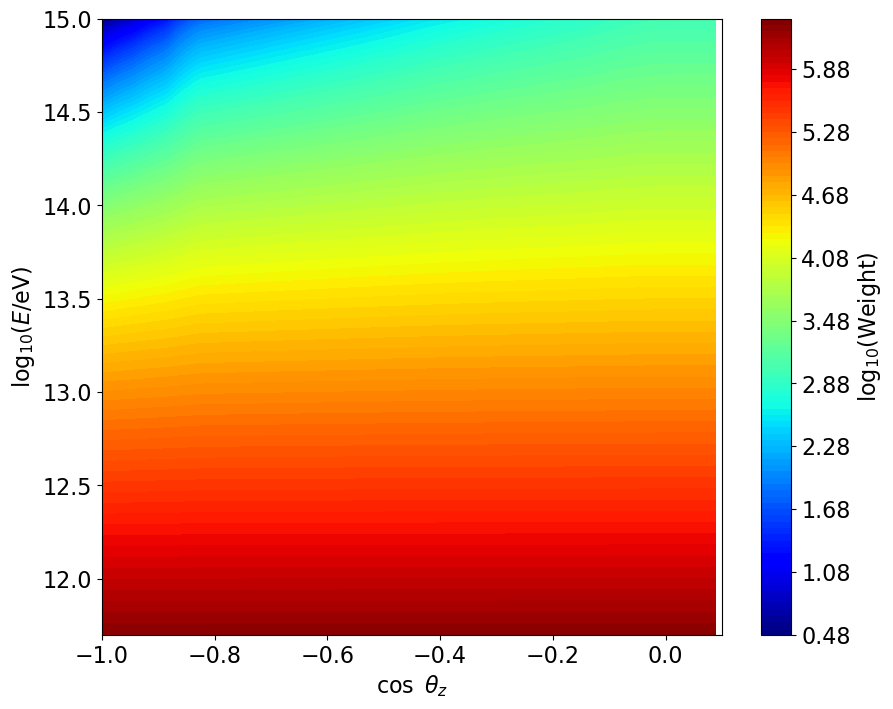

In [72]:
numu = 1
antineutrino = 1
figure = nsq_atm.PlotFlavor(numu,antineutrino)

# References

- <a id="CHM">[1]</a> *M.C. Gonzalez-Garcia, F. Halzen, and M. Maltoni*, **Physics Reach of High-Energy and High-Statistics IceCube Atmospheric Neutrino Data**, Phys.Rev. D71 (2005) 093010. http://arxiv.org/abs/hep-ph/0502223
- *C.A. Argüelles-Delgado, J. Salvado, and C. N. Weaver*, **SQuIDS: A Simple Quantum Integro Differential equation Solve.** On preparation.
- *C.A. Argüelles-Delgado, J. Salvado, and C. N. Weaver*, **$\nu$-SQuIDS: A tool box for neutrino oscillation experiments.** On preparation.
- M. Galassi et al, GNU Scientific Library Reference Manual (3rd Ed.), ISBN 0954612078. http://www.gnu.org/software/gsl/

## Test of e to tau neutrino osc w/ interactions through atmosphere impacting in a 60° cone with variable energy from 10-3000 GeV including neutrinos and anti neutrinos

In [73]:
interactions = True
E_min = 1.0e1*units.GeV
E_max = 3.0e3*units.GeV
E_nodes = 250
energy_nodes = nsq.logspace(E_min,E_max,E_nodes)

neutrino_flavors = 3

cth_min = -1.0
cth_max = -0.5
cth_nodes = 20
cth_nodes = nsq.linspace(cth_min,cth_max,cth_nodes) #from zenith incident to coming slightly cutting the surface 

nuSQ = nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions)

In [74]:
N0 = 5.0e18; Power = -2.4
Eflux = lambda E: N0*E**Power

AtmInitialFlux = np.zeros((len(cth_nodes),len(energy_nodes),2,neutrino_flavors))
for ic,cth in enumerate(nuSQ.GetCosthRange()):
    for ie,E in enumerate(nuSQ.GetERange()):
        AtmInitialFlux[ic][ie][0][0] = Eflux(E) # nue
        AtmInitialFlux[ic][ie][1][0] = Eflux(E) # bar nue
        AtmInitialFlux[ic][ie][0][1] = 0.0 # nu mu
        AtmInitialFlux[ic][ie][1][1] = 0.0 # bar nu mu
        AtmInitialFlux[ic][ie][0][2] = 0.0 # nu tau
        AtmInitialFlux[ic][ie][1][2] = 0.0 # bar nu tau
        
nuSQ.Set_initial_state(AtmInitialFlux,nsq.Basis.flavor)

In [75]:
nuSQ.Set_rel_error(1.0e-16)
nuSQ.Set_abs_error(1.0e-16)
nuSQ.EvolveState()

In [76]:
erange = nuSQ.GetERange()
neutype = 1
phi_e = [nuSQ.EvalFlavor(0,-0.5,EE,neutype) for EE in erange]
phi_mu = [nuSQ.EvalFlavor(1,-0.5,EE,neutype) for EE in erange]
phi_tau = [nuSQ.EvalFlavor(2,-0.5,EE,neutype) for EE in erange]

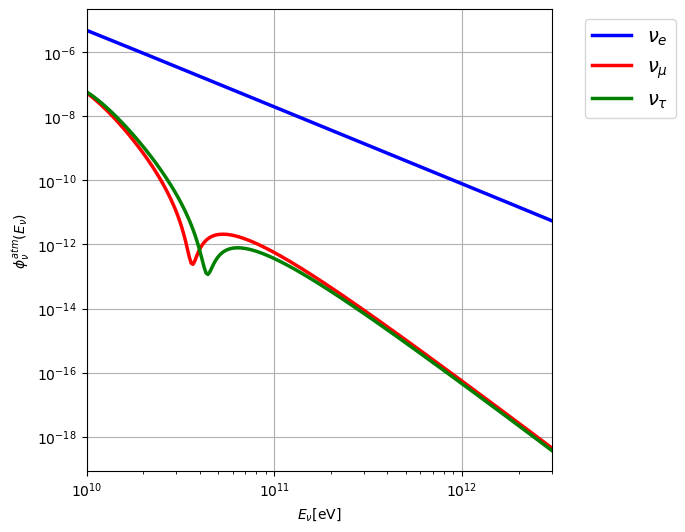

In [77]:
plt.figure(figsize = (6,6))

plt.plot(erange,phi_e, lw = 2.5, color = "blue", label = r"$\nu_e$")
plt.plot(erange,phi_mu, lw = 2.5, color = "red", label = r"$\nu_\mu$") #same size as phi_tau in the with the original parameters
plt.plot(erange,phi_tau, lw = 2.5, color = "green", label = r"$\nu_\tau$")

plt.loglog()

plt.xlim(erange[0],erange[-1])
plt.xlabel(r"$E_\nu [{\rm eV}]$")
plt.ylabel(r"$\phi^{atm}_\nu (E_\nu)$")

plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox = True)

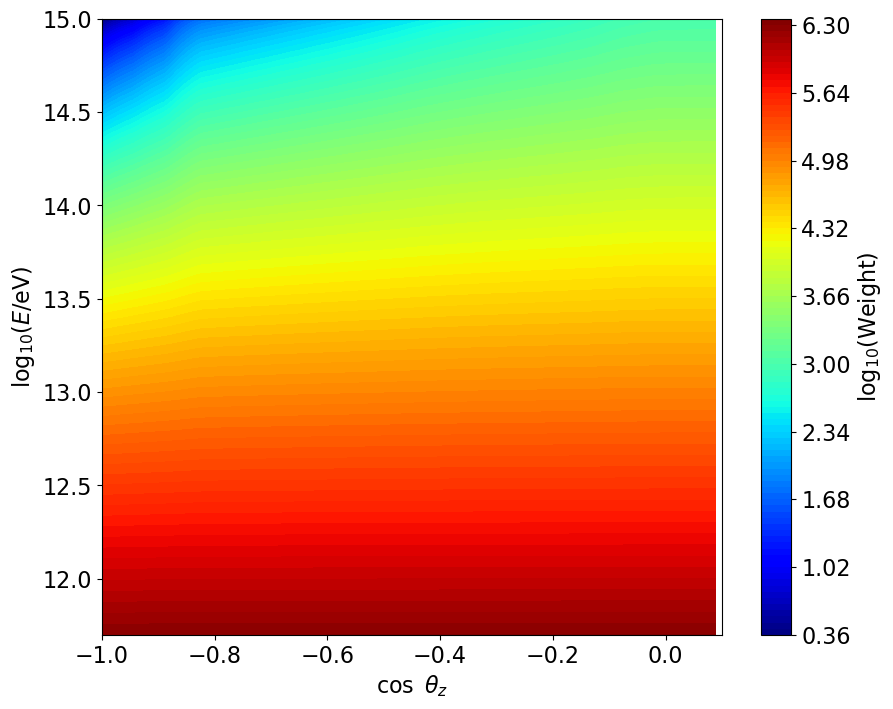

In [78]:
nutau = 2
neutrino = 0
figure = nsq_atm.PlotFlavor(nutau,neutrino) #PlotFlavor is function classext of nsqAtm --> nsqAtm itself doesnt find it, needs to be ExtnsqAtm object

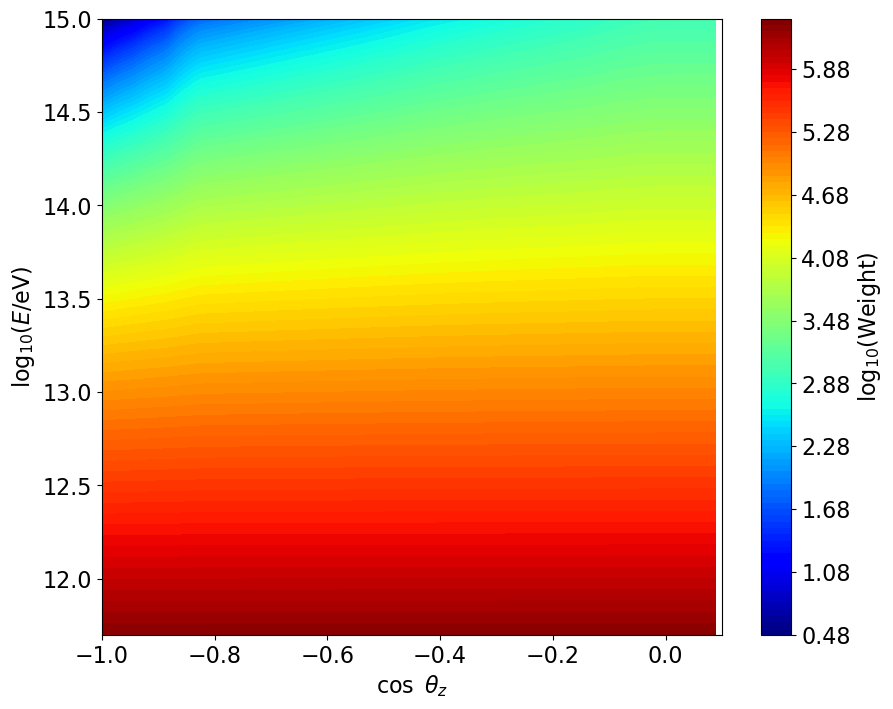

In [79]:
nutau = 2
antineutrino = 1
figure = nsq_atm.PlotFlavor(nutau,antineutrino) #PlotFlavor is function classext of nsqAtm --> nsqAtm itself doesnt find it, needs to be ExtnsqAtm object

In [80]:
dir(figure)

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_label_groups',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_button_pick_id',
 '_cachedRenderer',
 '_callbacks',
 '_canvas_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_constrained',
 '_constrained_layout_pads',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_get_draw_artists',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_localaxes',
 '_mouseover',
 '_normalize_grid_string',
 '_original_dpi',
 '_path_effects',
 '_picker',
 '_process_projection_r

In [81]:
tfin=t.time()
print("runtime=",tfin-t0,"s")

runtime= 134.4315493106842 s


## Optimal node spacing

In [82]:
cth_neg_dense=np.append(np.linspace(-1,-0.8,20),np.linspace(-0.8,-0.76,12)[1:])
cth_neg=np.append(cth_neg_dense,np.linspace(-0.76,0.0,16)[1:])
cth_pos=np.linspace(0.0,1.0,5)[1:]
cos_range_opt=np.append(cth_neg,cth_pos) #cos theta nodes similar to A. Trittin's thesis

In [83]:
E_1=np.geomspace(1,2,5)
E_2=np.geomspace(2,10,26)[1:]
E_3=np.geomspace(10,1000,21)[1:]
E_range_opt=np.append(np.append(E_1,E_2),E_3)

Text(0, 0.5, 'E-node')

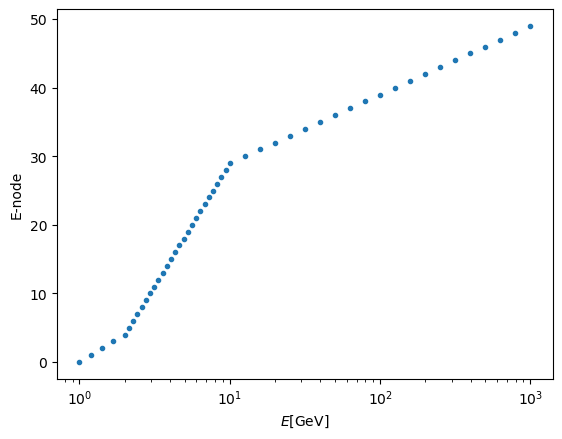

In [84]:
plt.plot(E_range_opt,range(len(E_range_opt)),'.')
plt.xscale('log')
plt.xlabel(r"$E [{\rm GeV}]$")
plt.ylabel("E-node")

Text(0, 0.5, 'cos$\\Theta$-node')

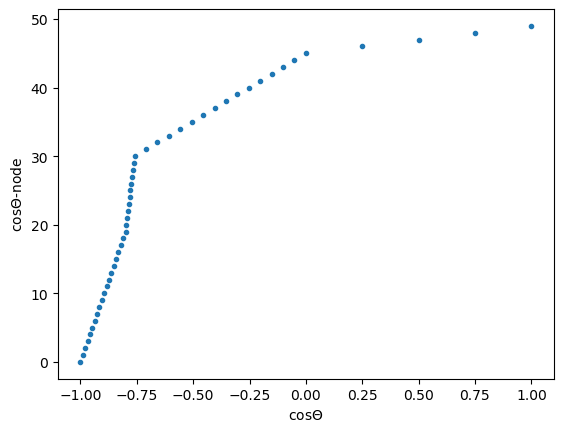

In [85]:
plt.plot(cos_range_opt,range(len(cos_range_opt)),'.')
plt.xlabel(r"cos$\Theta$")
plt.ylabel(r"cos$\Theta$-node")

## Test plots

## Earth track, 3 normal neutrinos, no interact, multi energy, osc prob.

In [86]:
interactions = False
energy_nodes= np.geomspace(1e-2,1e2,500)*units.GeV
nuSQ = nsq.nuSQUIDS(energy_nodes,3,nsq.NeutrinoType.neutrino,interactions)
nuSQ.Set_Body(nsq.Earth())
nuSQ.Set_Track(nsq.Earth.Track(750*units.km))

In [87]:
N0 = 1.0e18 
Eflux = lambda E: N0*E**-2 #power law lambda=-2
Einitial = (Eflux(nuSQ.GetERange()).reshape((len(energy_nodes),1)))*(np.array([0.,1.,0.]).reshape(1,3))

In [88]:
nuSQ.Set_initial_state(Einitial,nsq.Basis.flavor)
nuSQ.Set_rel_error(1.0e-17)
nuSQ.Set_abs_error(1.0e-17)
nuSQ.EvolveState() #doesnt evolve properly?

In [89]:
e_range = energy_nodes

nu_e = np.array([nuSQ.EvalFlavor(0,EE,0) 
                           for EE in e_range])
nu_mu = np.array([nuSQ.EvalFlavor(1,EE,0) 
                           for EE in e_range])
nu_tau = np.array([nuSQ.EvalFlavor(2,EE,0) 
                           for EE in e_range])

total = nu_e + nu_mu + nu_tau

In [90]:
""" 
working backup for bottom cell due to assert error?
plt.figure(figsize = (8,6))

plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$P [{\nu_\mu \to \nu_i}]$")

plt.plot(e_range,nu_e/Eflux(e_range), lw = 0.6, color = 'red', label = r"$\nu_e$")
plt.plot(e_range,nu_mu/Eflux(e_range), lw = 0.6, color = 'blue', label = r"$\nu_\mu$")
plt.plot(e_range,nu_tau/Eflux(e_range), lw = 0.6, color = 'green', label = r"$\nu_\tau$")
plt.plot(e_range,total/Eflux(e_range), lw = 1.4, color = 'black', label = r"Total")
plt.legend(fancybox = True, fontsize = 10)
plt.title(r"$\nu_\mu$ osc. through 750 km earthlike track, no interactions, $dn/dE \propto E^{-2}$")
plt.xscale('log')

plt.yscale('log')"""

' \nworking backup for bottom cell due to assert error?\nplt.figure(figsize = (8,6))\n\nplt.xlabel(r"$E_\nu [{\rm GeV}]$")\nplt.ylabel(r"$P [{\nu_\\mu \to \nu_i}]$")\n\nplt.plot(e_range,nu_e/Eflux(e_range), lw = 0.6, color = \'red\', label = r"$\nu_e$")\nplt.plot(e_range,nu_mu/Eflux(e_range), lw = 0.6, color = \'blue\', label = r"$\nu_\\mu$")\nplt.plot(e_range,nu_tau/Eflux(e_range), lw = 0.6, color = \'green\', label = r"$\nu_\tau$")\nplt.plot(e_range,total/Eflux(e_range), lw = 1.4, color = \'black\', label = r"Total")\nplt.legend(fancybox = True, fontsize = 10)\nplt.title(r"$\nu_\\mu$ osc. through 750 km earthlike track, no interactions, $dn/dE \\propto E^{-2}$")\nplt.xscale(\'log\')\n\nplt.yscale(\'log\')'

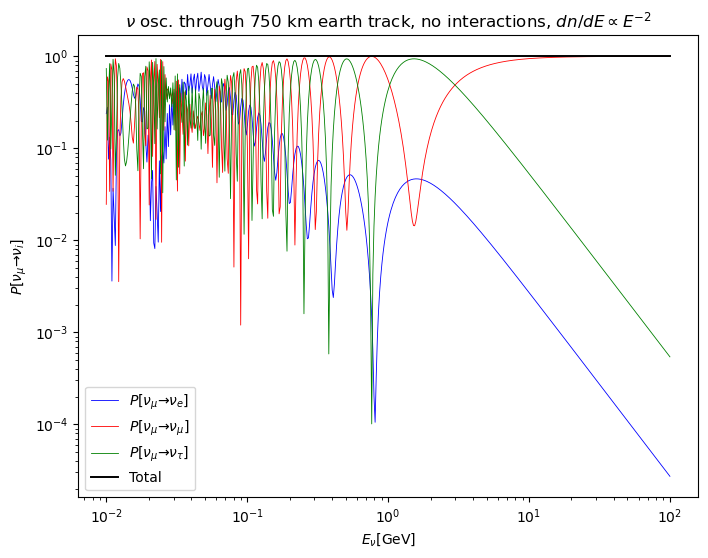

In [91]:
plt.figure(figsize = (8,6))

plt.xlabel(r"$E_\nu [{\rm GeV}]$")
plt.ylabel(r"$P [{\nu_\mu \to \nu_i}]$")

plt.plot(e_range/units.GeV,nu_e/Eflux(e_range), lw = 0.6, color = 'blue', label = r"$P [{\nu_\mu \to \nu_e}]$")
plt.plot(e_range/units.GeV,nu_mu/Eflux(e_range), lw = 0.6, color = 'red', label = r"$P [{\nu_\mu \to \nu_\mu}]$")
plt.plot(e_range/units.GeV,nu_tau/Eflux(e_range), lw = 0.6, color = 'green', label = r"$P [{\nu_\mu \to \nu_\tau}]$")
plt.plot(e_range/units.GeV,total/Eflux(e_range), lw = 1.4, color = 'black', label = r"Total")
plt.legend(fancybox = True, fontsize = 10)
plt.title(r"$\nu$ osc. through 750 km earth track, no interactions, $dn/dE \propto E^{-2}$")
plt.xscale('log')
plt.yscale('log')
plt.savefig("earth_testplot.svg",bbox_inches='tight')

## atmospheric, 3  neutrinos, interact, tau regen, multi energy, osc prob., $\nu, \bar{\nu}$, \$\Theta=\pi$

In [92]:
interactions = True
energy_nodes=nsq.logspace(1e0,1e3,500)*units.GeV
neutrino_flavors=3
nuSQ = nsq.nuSQUIDS(energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions)
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1))) #perpendicular measurement
nuSQ.Set_TauRegeneration(True)

In [93]:
N0 = 1.0e18; Power = -2.0
Eflux = lambda E: N0*E**Power

InitialFlux = np.zeros((500,2,3))
for i,E in enumerate(nuSQ.GetERange()):
    InitialFlux[i][0][0] = 0.0
    InitialFlux[i][1][0] = 0.0
    InitialFlux[i][0][1] = Eflux(E) #muomn and anitmuon neutrino flux equal while electron/tau anti/neutrino flux 0
    InitialFlux[i][1][1] = Eflux(E)
    InitialFlux[i][0][2] = 0.0
    InitialFlux[i][1][2] = 0.0


In [94]:
nuSQ.Set_rel_error(1.0e-15) #much lower precision than for simple cases, 10-7 original value
nuSQ.Set_abs_error(1.0e-15)
nuSQ.Set_h_max(500.0*units.km)
nuSQ.Set_MixingParametersToDefault()
nuSQ.Set_initial_state(InitialFlux,nsq.Basis.flavor)

In [95]:
t0_1=t.time()
nuSQ.EvolveState()
print(t.time()-t0_1,"s")

66.54468727111816 s


In [96]:
nu_tau = np.array([ nuSQ.EvalFlavorAtNode(2,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_tau_bar = np.array([ nuSQ.EvalFlavorAtNode(2,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

nu_mu = np.array([ nuSQ.EvalFlavorAtNode(1,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_mu_bar = np.array([ nuSQ.EvalFlavorAtNode(1,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

nu_e = np.array([ nuSQ.EvalFlavorAtNode(0,ie,0) for ie,EE in enumerate(nuSQ.GetERange())])
nu_e_bar = np.array([ nuSQ.EvalFlavorAtNode(0,ie,1) for ie,EE in enumerate(nuSQ.GetERange())])

total=nu_tau+nu_tau_bar+nu_mu+nu_mu_bar+nu_e+nu_e_bar

E_range = nuSQ.GetERange()

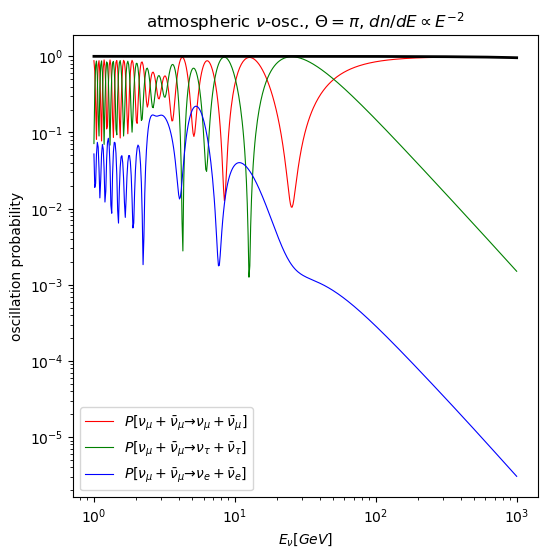

In [97]:
plt.figure(figsize = (6,6))
plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"oscillation probability")

plt.plot(E_range/units.GeV,(nu_mu+nu_mu_bar)/Eflux(energy_nodes)/2, lw = .8, color = 'red',label=r"$P [\nu_\mu + \bar{\nu}_\mu \to \nu_\mu +\bar{\nu}_\mu]$")
plt.plot(E_range/units.GeV,(nu_tau+nu_tau_bar)/Eflux(energy_nodes)/2, lw = .8, color = 'green',label=r"$P [\nu_\mu + \bar{\nu}_\mu \to \nu_\tau +\bar{\nu}_\tau]$")
plt.plot(E_range/units.GeV,(nu_e+nu_e_bar)/Eflux(energy_nodes)/2, lw = .8, color = 'blue',label=r"$P [\nu_\mu + \bar{\nu}_\mu \to \nu_e + \bar{\nu}_e]$")
plt.plot(E_range/units.GeV,total/Eflux(energy_nodes)/2, lw = 2, color = 'black')
plt.title(r"atmospheric $\nu$-osc., $\Theta=\pi$, $dn/dE \propto E^{-2}$")
plt.legend(fancybox = True, fontsize = 10)        
plt.xscale('log')
plt.yscale('log')
plt.savefig("atmospheric_testplot.svg",bbox_inches='tight')

## atmos, 3+1, multi energy, tau regen, interact, $\nu, \bar{\nu}$, $\Theta=\pi$, osc prob 

In [98]:
interactions=True
energy_nodes=E_range_opt*units.GeV #between 1 and 1000 GeV
cth_nodes=cos_range_opt
neutrino_flavors=4
nuSQ = nsq.nuSQUIDS(energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions)
nuSQ.Set_Body(nsq.EarthAtm())
nuSQ.Set_Track(nsq.EarthAtm.Track(np.arccos(-1))) #perpendicular measurement
nuSQ.Set_TauRegeneration(True)

In [99]:
nuSQ.Set_MixingParametersToDefault()
nuSQ.Set_SquareMassDifference(3,1.)
nuSQ.Set_MixingAngle(1,3,0.6)

N0 = 1.0e18
Eflux = lambda E: N0*E**-2
IniFlux = np.zeros((len(energy_nodes),2,neutrino_flavors))
for i,E in enumerate(nuSQ.GetERange()):
    IniFlux[i][0][0] = Eflux(E) #muomn and anitmuon neutrino flux equal while electron/tau anti/neutrino flux 0
    IniFlux[i][1][0] = Eflux(E)
    IniFlux[i][0][1] = 0.0 
    IniFlux[i][1][1] = 0.0
    IniFlux[i][0][2] = 0.0
    IniFlux[i][1][2] = 0.0
    IniFlux[i][0][3] = 0.0
    IniFlux[i][1][3] = 0.0

In [100]:
nuSQ.Set_initial_state(IniFlux,nsq.Basis.flavor)
nuSQ.Set_rel_error(1.0e-7)
nuSQ.Set_abs_error(1.0e-7)

In [101]:
%time
nuSQ.EvolveState()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [102]:
e_range = np.logspace(0,3,400) #10^0 to 10^2 GeV in 400 steps

nu_e = np.array([nuSQ.EvalFlavor(0,EE*units.GeV,0)
                           for EE in e_range])
nu_mu = np.array([nuSQ.EvalFlavor(1,EE*units.GeV,0)
                           for EE in e_range])
nu_tau = np.array([nuSQ.EvalFlavor(2,EE*units.GeV,0)
                           for EE in e_range])

anti_nu_e = np.array([nuSQ.EvalFlavor(0,EE*units.GeV,1)
                           for EE in e_range])
anti_nu_mu = np.array([nuSQ.EvalFlavor(1,EE*units.GeV,1)
                           for EE in e_range])
anti_nu_tau = np.array([nuSQ.EvalFlavor(2,EE*units.GeV,1)
                           for EE in e_range])

nu_s = np.array([nuSQ.EvalFlavor(3,EE*units.GeV,0)
                           for EE in e_range])

anti_nu_s = np.array([nuSQ.EvalFlavor(3,EE*units.GeV,1)
                           for EE in e_range])

total_nu = nu_e + nu_mu + nu_tau
total_anti_nu = anti_nu_e + anti_nu_mu + anti_nu_tau

total_e=nu_e+anti_nu_e
total_mu=nu_mu+anti_nu_mu
total_tau=nu_tau+anti_nu_tau
total_s=nu_s+anti_nu_s

total2=total_nu+total_anti_nu+total_s

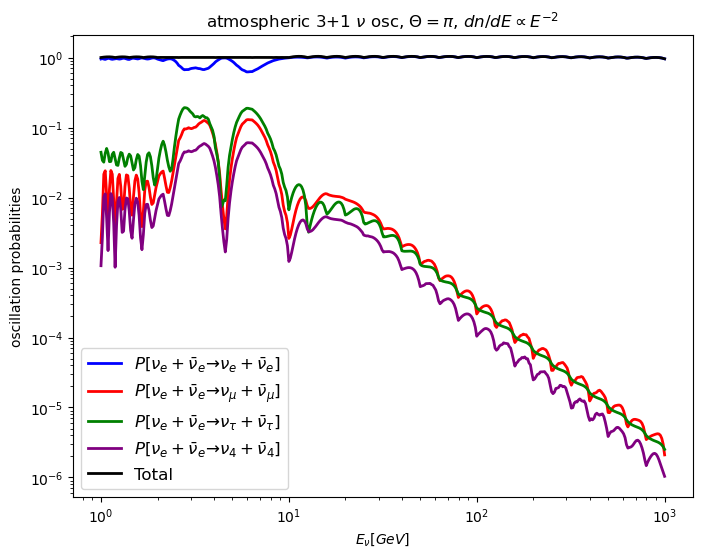

In [103]:
plt.figure(figsize = (8,6))

plt.xlabel(r"$E_\nu [GeV]$")
plt.ylabel(r"oscillation probabilities")

plt.plot(e_range,total_e/Eflux(e_range)*N0/2, lw = 2, color = 'blue', label = r"$P [\nu_e + \bar{\nu}_e \to \nu_e +\bar{\nu}_e]$")
plt.plot(e_range,total_mu/Eflux(e_range)*N0/2, lw = 2, color = 'red', label = r"$P [\nu_e + \bar{\nu}_e \to \nu_\mu +\bar{\nu}_\mu]$")
plt.plot(e_range,total_tau/Eflux(e_range)*N0/2, lw = 2, color = 'green', label = r"$P [\nu_e + \bar{\nu}_e \to \nu_\tau +\bar{\nu}_\tau]$")
plt.plot(e_range,total_s/Eflux(e_range)*N0/2, lw = 2, color = 'purple', label = r"$P [\nu_e + \bar{\nu}_e \to \nu_4 +\bar{\nu}_4]$")
plt.plot(e_range,total2/Eflux(e_range)*N0/2, lw = 2, color = 'black', label = r"Total")

plt.legend(fancybox = True, fontsize = 12)
plt.title(r"atmospheric 3+1 $\nu$ osc, $\Theta=\pi$, $dn/dE \propto E^{-2}$")

plt.loglog()
plt.savefig("atmospheric_sterile_testplot.svg",bbox_inches='tight')

## Now with a variable $cos(\Theta)$

In [104]:
interactions = True

energy_nodes=E_range_opt*units.GeV #E_range_opt is in eV!!!!! NEED TO SCALE UP OR EXCEEDINGLY LONG LOADING TIMES!!!

cth_nodes = cos_range_opt

neutrino_flavors = 4

nsq_atm4 = nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,neutrino_flavors,nsq.NeutrinoType.both,interactions) #changed object nsq.nuSQAtm to nuSQUIDSTools.ExtnuSQdAtm

In [105]:
nsq_atm4.Set_MixingParametersToDefault()
nsq_atm4.Set_SquareMassDifference(3,1.)
nsq_atm4.Set_MixingAngle(1,3,0.6)
nsq_atm4.Set_TauRegeneration(True)

In [106]:
N0 = 1.0e18; Power = -1.0
Eflux = lambda E: N0*E**Power

N0 = 1.0e18
Eflux = lambda E: N0*E**-2
IniFlux = np.zeros((len(cth_nodes),len(energy_nodes),2,neutrino_flavors))
for j,cos in enumerate(nsq_atm4.GetCosthRange()):    
    for i,E in enumerate(nsq_atm4.GetERange()):
        IniFlux[j][i][0][0] = Eflux(E)
        IniFlux[j][i][1][0] = Eflux(E)
        IniFlux[j][i][0][1] = 0.0 
        IniFlux[j][i][1][1] = 0.0
        IniFlux[j][i][0][2] = 0.0
        IniFlux[j][i][1][2] = 0.0
        IniFlux[j][i][0][3] = 0.0
        IniFlux[j][i][1][3] = 0.0
    
IniFlux4=IniFlux

In [107]:
nsq_atm4.Set_initial_state(IniFlux4,nsq.Basis.flavor)

In [108]:
temp=t.time()
nsq_atm4.Set_rel_error(1.0e-7) #1e-15 orignially
nsq_atm4.Set_abs_error(1.0e-7)
nsq_atm4.EvolveState()
print(t.time()-temp,"s") #takes ~4 mins at -7, 6.5 mins at -8, -9 at 10.5 mins no significant difference

192.42096519470215 s


In [109]:
erange = nsq_atm4.GetERange()
neutype = 1
phi_e = np.array([nsq_atm4.EvalFlavor(0,-0.5,EE,neutype) for EE in erange]) #flavor, costheta, energy, (neutype, randomize height)
phi_mu = np.array([nsq_atm4.EvalFlavor(1,-0.5,EE,neutype) for EE in erange])
phi_tau = np.array([nsq_atm4.EvalFlavor(2,-0.5,EE,neutype) for EE in erange])
phi_s = np.array([nsq_atm4.EvalFlavor(3,-0.5,EE,neutype) for EE in erange])
total = np.array(phi_e) + np.array(phi_mu) + np.array(phi_tau) + np.array(phi_s)

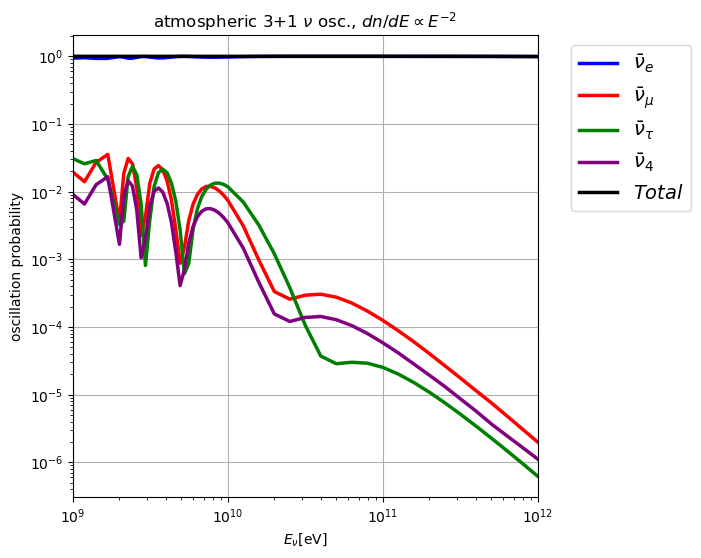

In [110]:
plt.figure(figsize = (6,6))

plt.plot(erange,phi_e/Eflux(erange), lw = 2.5, color = "blue", label = r"$\bar{\nu}_e$")
plt.plot(erange,phi_mu/Eflux(erange), lw = 2.5, color = "red", label = r"$\bar{\nu}_\mu$") #same size as phi_tau in the with the original parameters
plt.plot(erange,phi_tau/Eflux(erange), lw = 2.5, color = "green", label = r"$\bar{\nu}_\tau$")
plt.plot(erange,phi_s/Eflux(erange), lw = 2.5, color = "purple", label = r"$\bar{\nu}_4$")
plt.plot(erange,total/Eflux(erange), lw = 2.5, color = "black", label = r"$Total$")

plt.loglog()

plt.xlim(erange[0],erange[-1])
plt.xlabel(r"$E_\nu [{\rm eV}]$")
plt.ylabel(r"oscillation probability")

plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox = True)
plt.title(r"atmospheric 3+1 $\nu$ osc., $dn/dE \propto E^{-2}$")
plt.savefig("atmospheric_mode_anti_sterile_testplot.svg",bbox_inches='tight')

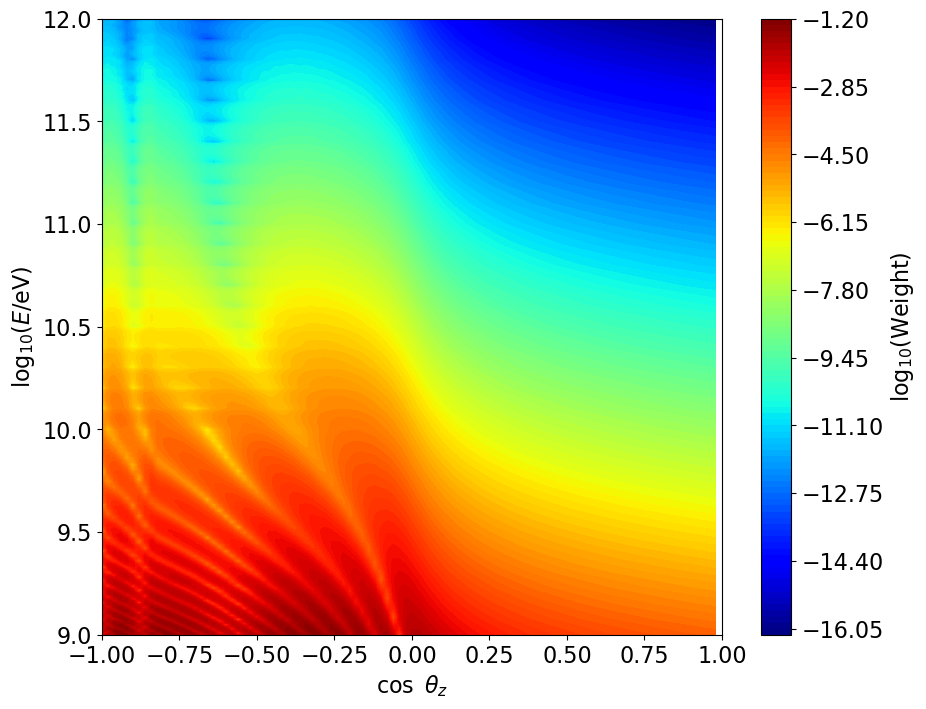

In [111]:
nus = 3
antineutrino = 1
figure = nsq_atm4.PlotFlavor(nus,antineutrino) #PlotFlavor is function classext of nsqAtm --> nsqAtm itself doesnt find it, needs to be ExtnsqAtm object

In [112]:
erange = nsq_atm4.GetERange()
neutype = 0
phi_e = np.array([nsq_atm4.EvalFlavor(0,-0.5,EE,neutype) for EE in erange]) #flavor, costheta, energy, (neutype, randomize height)
phi_mu = np.array([nsq_atm4.EvalFlavor(1,-0.5,EE,neutype) for EE in erange])
phi_tau = np.array([nsq_atm4.EvalFlavor(2,-0.5,EE,neutype) for EE in erange])
phi_s = np.array([nsq_atm4.EvalFlavor(3,-0.5,EE,neutype) for EE in erange])
total = np.array(phi_e) + np.array(phi_mu) + np.array(phi_tau) + np.array(phi_s)

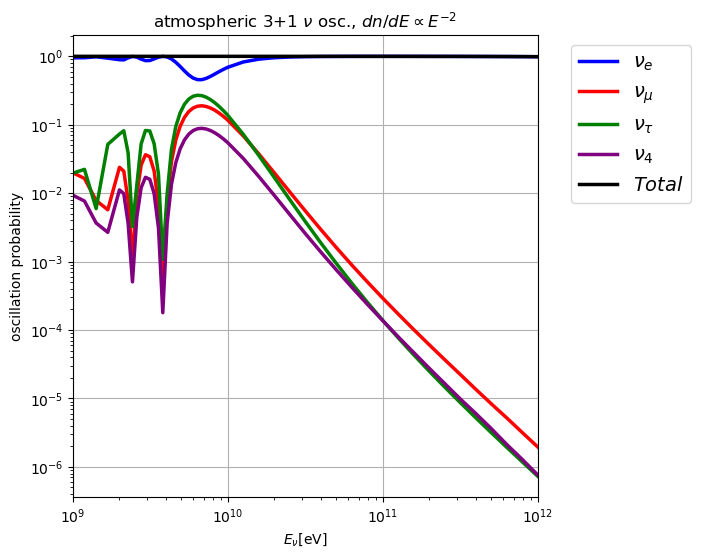

In [113]:
plt.figure(figsize = (6,6))

plt.plot(erange,phi_e/Eflux(erange), lw = 2.5, color = "blue", label = r"$\nu_e$")
plt.plot(erange,phi_mu/Eflux(erange), lw = 2.5, color = "red", label = r"$\nu_\mu$") #same size as phi_tau in the with the original parameters
plt.plot(erange,phi_tau/Eflux(erange), lw = 2.5, color = "green", label = r"$\nu_\tau$")
plt.plot(erange,phi_s/Eflux(erange), lw = 2.5, color = "purple", label = r"$\nu_4$")
plt.plot(erange,total/Eflux(erange), lw = 2.5, color = "black", label = r"$Total$")

plt.loglog()

plt.xlim(erange[0],erange[-1])
plt.xlabel(r"$E_\nu [{\rm eV}]$")
plt.ylabel(r"oscillation probability")

plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox = True)
plt.title(r"atmospheric 3+1 $\nu$ osc., $dn/dE \propto E^{-2}$")
plt.savefig("atmospheric_mode_sterile_testplot.svg",bbox_inches='tight')

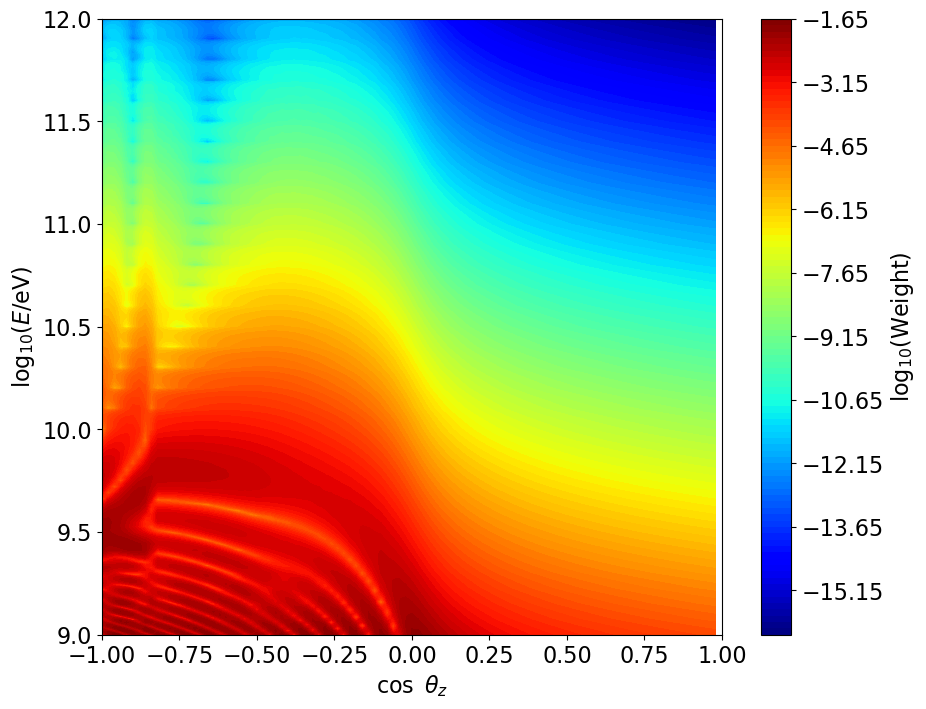

In [114]:
nus = 3
neutrino = 0
figure = nsq_atm4.PlotFlavor(nus,neutrino) #PlotFlavor is function classext of nsqAtm --> nsqAtm itself doesnt find it, needs to be ExtnsqAtm object
plt.savefig("FluxHeatMap_3_1_neutrino")

In [115]:
dir(nsq_atm4)

['EvalFlavor',
 'EvolveState',
 'GetCosthRange',
 'GetERange',
 'GetNeutrinoCrossSections',
 'GetNumCos',
 'GetNumE',
 'GetNumNeu',
 'GetNumRho',
 'Get_CPPhase',
 'Get_EvalThreads',
 'Get_MixingAngle',
 'Get_SquareMassDifference',
 'GetnuSQuIDS',
 'PlotFlavor',
 'ReadStateHDF5',
 'SetNeutrinoCrossSections',
 'Set_AllowConstantDensityOscillationOnlyEvolution',
 'Set_CPPhase',
 'Set_EarthModel',
 'Set_EvalThreads',
 'Set_GSL_step',
 'Set_GlashowResonance',
 'Set_IncludeOscillations',
 'Set_MixingAngle',
 'Set_MixingParametersToDefault',
 'Set_PositivyConstrain',
 'Set_PositivyConstrainStep',
 'Set_ProgressBar',
 'Set_SquareMassDifference',
 'Set_TauRegeneration',
 'Set_abs_error',
 'Set_h',
 'Set_h_max',
 'Set_h_min',
 'Set_initial_state',
 'Set_rel_error',
 'WriteStateHDF5',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metac